# Exemplos - leitura de imagens com a OpenCV

Tópicos 

* [Leitura e exibição de imagens no notebook](#leitura)
* [Conversão entre tipos de cor](#conversao)
* [Separação de canais em R,G,B](#canais)

In [2]:
import cv2

print ("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 4.5.5 


A biblioteca *OpenCV* é importada no Python com `import cv2`.

A versão ideal para esta disciplina é a *OpenCV 4*, que também se chama `cv2` (não existe `cv4`)

O `print` acima vai dizer a versão que você tem.

Se estiver com problemas com o OpenCV no Anaconda, siga os passos do guia [opencv_anaconda](https://github.com/Insper/robot22.1/blob/main/guides/opencv_anaconda.md)


<div id="leitura"></div>

# Leitura e exibição de imagens

A função `cv2.imread` lê imagens de um arquivo.

<img src="img9x9_aumentada.png"/>

In [3]:
grid = cv2.imread("img9x9_aumentada.png")

Uma das formas de exibir a imagem é com `matplotlib`

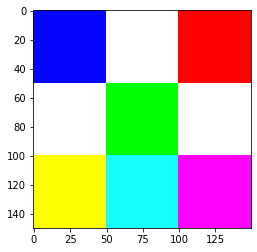

In [4]:
import matplotlib.pyplot as plt
plt.imshow(grid,interpolation="none")
plt.show()

O que aconteceu? Historicamente, a ordem dos sub-pixels das imagens usadas pelo OpenCV é invertida: em vez de `RGB` é `BGR`.

Vamos realizar uma conversão de tipos entre `BGR` e `RGB` usando a função cvtColor. 

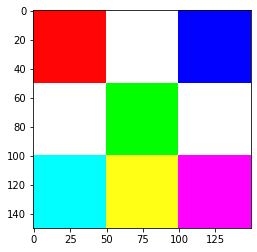

In [5]:
grid_rgb = cv2.cvtColor(grid, cv2.COLOR_BGR2RGB)
plt.imshow(grid_rgb,interpolation="none")
plt.show()

Podemos também usar janelas do OpenCV para mostrar imagens. Só não podemos esquecer de chamar `cv2.waitKey()` para mostrar a imagem, e `cv2.destroyAllWindows()` para fechar as janelas antes de sair da célula de código

In [6]:
cv2.imshow("Imagem BGR", grid)
cv2.waitKey()
cv2.destroyAllWindows()

## Imagens como matrizes

No OpenCV as imagens são matrizes do numpy. Vamos carrgar uma versão pequena da imagem anterior, com apenas 9 pixels 

In [6]:
mini_grid = cv2.imread("img9x9.png")
mini_grid_rgb = cv2.cvtColor(mini_grid, cv2.COLOR_BGR2RGB)
type(mini_grid_rgb)

mini_grid_rgb.shape

(3, 3, 3)

In [7]:
mini_grid_rgb

array([[[255,   5,   5],
        [255, 255, 255],
        [  1,   1, 255]],

       [[255, 255, 255],
        [  1, 255,   1],
        [255, 255, 255]],

       [[  2, 255, 255],
        [255, 255,  21],
        [255,   1, 255]]], dtype=uint8)

Note que o *tipo* 'uint8'  quer dizer *unsigned int de 8 bits*. Ou seja, é capaz de representar entre $0$ e $2^{8}-1=255$

Esta informação é importante quando manipularmos os bits da imagem. É preciso ter certeza de que não vai ocorrer *overflow* - atribuir valores que o tipo não suporte

## Transposta de uma matriz

Precisamos especificar na transposta a ordem em que esperamos que as dimensões da imagem original apareçam. O padrão da OpenCV para a ordem das dimensões é `0=linhas`,  `1=colunas` e `2=componentes de cor`. O que queremos é uma transposta de linhas e colunas, portanto deve ficar como abaixo:

In [14]:
trans = grid_rgb.transpose((1,0,2))

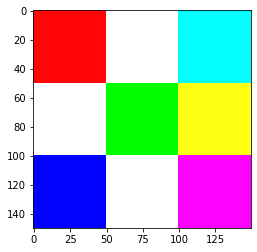

In [15]:
plt.imshow(trans,interpolation="none")
plt.show()

Note que a imagem acima teve linhas e colunas transpostas

In [16]:
arara = cv2.imread("arara_medium.jpg")

O atributo `shape` traz as dimensões da matriz

In [17]:
arara.shape

(333, 500, 3)

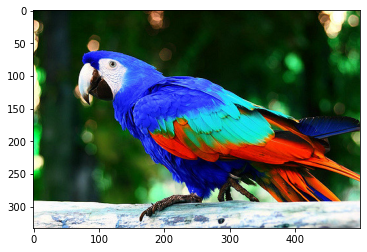

In [18]:
plt.imshow(arara)
plt.show()

Vamos transpor também a imagem da arara

In [19]:
trans_arara = arara.transpose((1,0,2))

In [20]:
arara.shape

(333, 500, 3)

In [21]:
trans_arara.shape

(500, 333, 3)

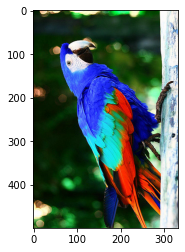

In [22]:
plt.imshow(trans_arara)
plt.show()

<div id="conversao"></div>

## Conversão entre tipos de cor

Na OpenCV a função cv2.cvtColor faz a conversão entre tipos de cor. No caso vamos converter de BGR para RGB

In [23]:
arara_rgb = cv2.cvtColor(arara, cv2.COLOR_BGR2RGB)

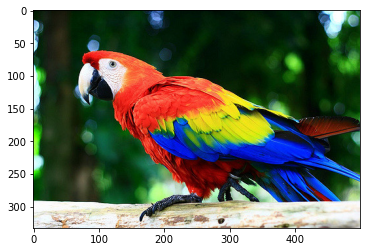

In [24]:
plt.imshow(arara_rgb)
plt.show()

In [25]:
arara_rgb.shape

(333, 500, 3)

<div id=canais></div>

# Separando os canais da imagem

O OpenCV permite gerenciar os canais de cor usando `cv2.split()` e `cv2.merge()`

In [26]:
arara_r, arara_g, arara_b = cv2.split(arara_rgb)
print(arara_rgb.shape)

(333, 500, 3)


A terceira dimensão é a das componentes de cor. Nesta dimensão, também podemos separar R,G e B usando os índices

Canal vermelho

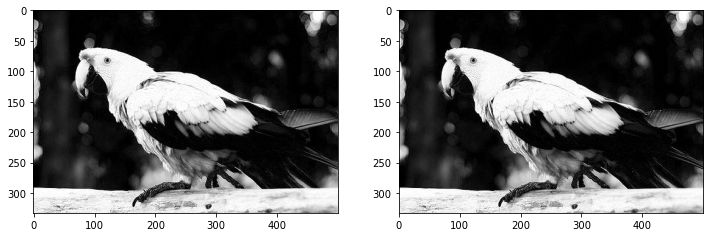

In [27]:
plt.figure(figsize=(12,20))
plt.subplot(121)
plt.imshow(arara_r, cmap='gray') # Mostrando o resultado de cv2.split()
plt.subplot(122)
plt.imshow(arara_rgb[:,:,0], cmap='gray') # Mostrando o resultado do canal 0
plt.show()

Canal verde

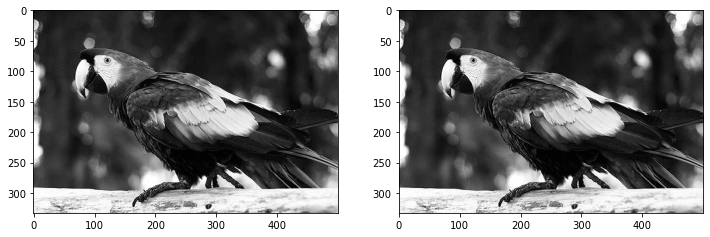

In [28]:
plt.figure(figsize=(12,20))
plt.subplot(121)
plt.imshow(arara_g, cmap='gray') # Mostrando o resultado de cv2.split()
plt.subplot(122)
plt.imshow(arara_rgb[:,:,1], cmap='gray') # Mostrando o resultado do canal 1
plt.show()

Canal azul

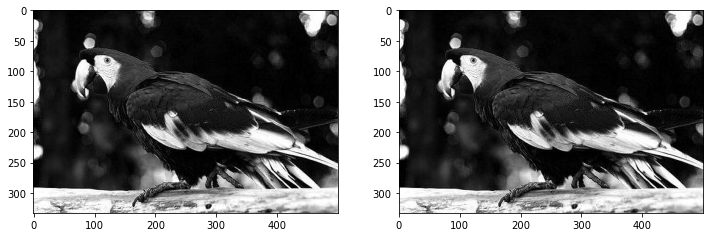

In [29]:
plt.figure(figsize=(12,20))
plt.subplot(121)
plt.imshow(arara_b, cmap='gray') # Mostrando o resultado de cv2.split()
plt.subplot(122)
plt.imshow(arara_rgb[:,:,2], cmap='gray') # Mostrando o resultado do canal 2
plt.show()

Podemos também voltar à imagem original combinando os canais

In [30]:
arara_rgb_original = cv2.merge([arara_r, arara_g, arara_b])

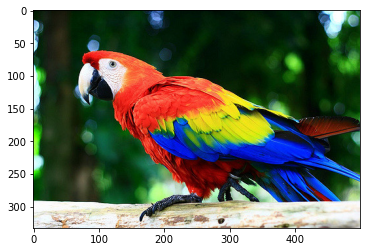

In [31]:
plt.imshow(arara_rgb_original)
plt.show()

# Input da webcam

Devemos usar cv2.VideoCapture para ler de câmeras e arquivos de vídeo

In [42]:
webcam = cv2.VideoCapture(0) # Tente vários IDs para descobrir qual é em sua webcam

In [43]:
import time as t
t.sleep(5) # Espera a webcam ficar pronta

A função que de fato lê é a `read()`

In [44]:
val, image = webcam.read()

In [45]:
val  # Checa se um frame chegou

True

In [46]:
webcam.release() # fecha a webcam

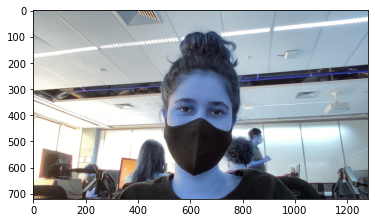

In [47]:
plt.imshow(image)
plt.show()

In [48]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

Vamos ver a imagem

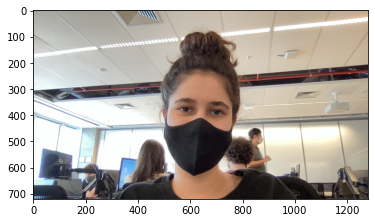

In [49]:
plt.imshow(image_rgb)
plt.show()

Podemos também usar a janela do OpenCV para mostrar um video

In [50]:
webcam = cv2.VideoCapture(0)
while(True):
    val, image = webcam.read()
    if val:
        cv2.imshow("Vídeo da câmera", image)
    if cv2.waitKey(1) == 27: # Aguarda 1 ms pela tecla 'ESC'
        break
            
cv2.destroyAllWindows()
webcam.release()

# Para praticar

## 1 - Usando a célula abaixo, baixe uma imagem da internet, carregue essa imagem e mostre os seus três canais usando `matplotlib`. 

In [1]:
import cv2
import matplotlib.pyplot as plt

# Seu código aqui

In [2]:
nezuko = cv2.imread("nezuko.jpeg")

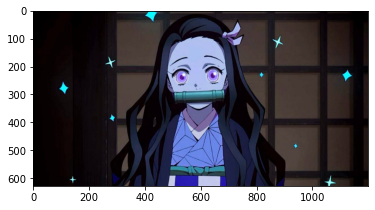

In [3]:
plt.imshow(nezuko)
plt.show()

In [4]:
trans_nezuko = nezuko.transpose((1,0,2))

In [5]:
trans_nezuko.shape

(1200, 628, 3)

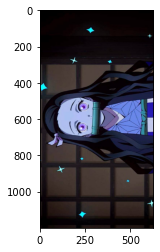

In [6]:
plt.imshow(trans_nezuko)
plt.show()

In [7]:
nezuko_rgb = cv2.cvtColor(nezuko, cv2.COLOR_BGR2RGB)

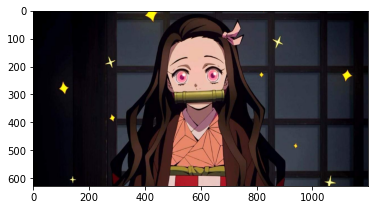

In [8]:
plt.imshow(nezuko_rgb)
plt.show()

In [9]:
nezuko_r, nezuko_g, nezuko_b = cv2.split(nezuko_rgb)
print(nezuko_rgb.shape)

(628, 1200, 3)


### CANAL VERMELHO

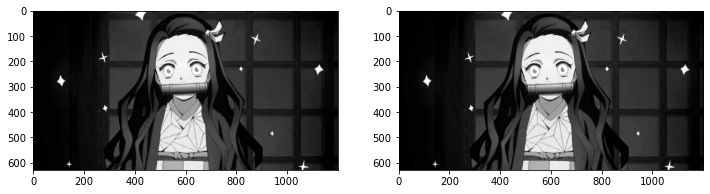

In [10]:
plt.figure(figsize=(12,20))
plt.subplot(121)
plt.imshow(nezuko_r, cmap='gray') # Mostrando o resultado de cv2.split()
plt.subplot(122)
plt.imshow(nezuko_rgb[:,:,0], cmap='gray') # Mostrando o resultado do canal 0
plt.show()

### CANAL VERDE

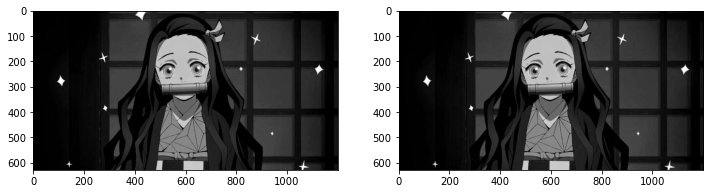

In [11]:
plt.figure(figsize=(12,20))
plt.subplot(121)
plt.imshow(nezuko_g, cmap='gray') # Mostrando o resultado de cv2.split()
plt.subplot(122)
plt.imshow(nezuko_rgb[:,:,1], cmap='gray') # Mostrando o resultado do canal 1
plt.show()

### CANAL AZUL

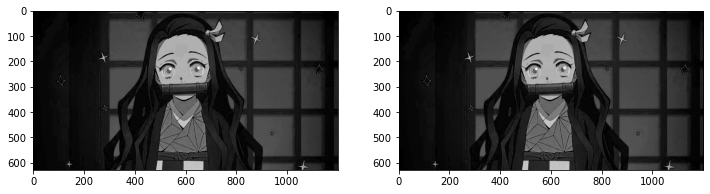

In [12]:
plt.figure(figsize=(12,20))
plt.subplot(121)
plt.imshow(nezuko_b, cmap='gray') # Mostrando o resultado de cv2.split()
plt.subplot(122)
plt.imshow(nezuko_rgb[:,:,2], cmap='gray') # Mostrando o resultado do canal 2
plt.show()

In [13]:
nezuko_rgb_original = cv2.merge([nezuko_r, nezuko_g, nezuko_b])

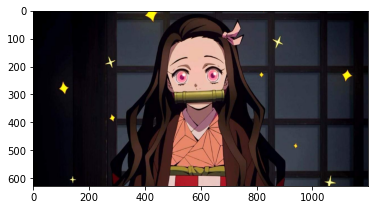

In [14]:
plt.imshow(nezuko_rgb_original)
plt.show()


## 2 - Usando a célula abaixo, mostre o video de sua webcam com as cores "invertidas" (RGB em vez de BGR), e com a imagem transposta. 

In [2]:
import cv2
import matplotlib.pyplot as plt

# Seu código aqui

In [3]:
webcam = cv2.VideoCapture(0)
while(True):
    val, image = webcam.read()
    if val:
        trans_image = image.transpose((1,0,2))
        image_rgb = cv2.cvtColor(trans_image, cv2.COLOR_BGR2RGB)
        cv2.imshow("Vídeo da câmera", image_rgb)
    if cv2.waitKey(1) == 27: # Aguarda 1 ms pela tecla 'ESC'
        break
            
cv2.destroyAllWindows()
webcam.release()